In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import numpy as np

In [181]:
mouse_metadata=pd.read_csv("module_5_starter_code/Pymaceuticals/data/Mouse_metadata.csv")
mouse_metadata.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
17,a644,Ramicane,Female,7,17
70,c139,Infubinol,Male,11,28
124,k483,Infubinol,Female,20,30
98,f545,Zoniferol,Female,20,26
197,t724,Naftisol,Female,2,25
248,z969,Naftisol,Male,9,30
64,b313,Zoniferol,Male,12,27
160,o725,Naftisol,Male,4,26
102,g296,Zoniferol,Female,14,29
202,u946,Propriva,Male,5,30


In [182]:
study_results=pd.read_csv("module_5_starter_code/Pymaceuticals/data/Study_results.csv")
study_results.sample(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
726,o302,15,51.381489,0
590,l725,10,50.823912,2
563,w193,10,48.346550,0
1754,q511,40,63.194428,2
312,m601,5,41.408591,1
58,c458,0,45.000000,0
1453,c282,30,59.005902,1
1834,w575,45,68.401286,3
781,v289,15,52.602166,0
1031,g791,20,41.211897,0


In [183]:
combined_df=pd.merge(mouse_metadata,study_results,on="Mouse ID", how="outer")
# Checking the number of mice.
id_dataframe=combined_df["Mouse ID"].unique()
print(len(id_dataframe))

249


In [184]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate=combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicate)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [185]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_mouth = combined_df.loc[combined_df["Mouse ID"] == "g989"]
g989_mouth 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [186]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [187]:
id=cleaned_df["Mouse ID"].nunique()
id



248

# *Summary Statistics*

In [188]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_volume=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor_volume=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor_volume=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sterror_tumor_volume=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


summary_drugs={
    "Mean Tumor Volume":mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,
    "Tumor Volume Variance":variance_tumor_volume,
    "Tumor Volume Std. Dev.":std_tumor_volume,
    "Tumor Volume Std. Err.":sterror_tumor_volume
}



summary_drugs = pd.DataFrame(summary_drugs)
summary_drugs.index.name = "Drug Regimen"

# Display results
summary_drugs

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [218]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_drug_al = cleaned_df.groupby(["Drug Regimen"]).aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
summary_drug_al 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## *Bar and Pie Charts*


<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

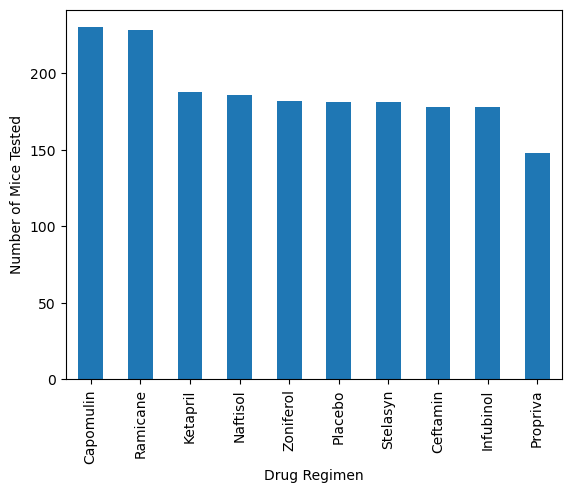

In [190]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen = cleaned_df.groupby("Drug Regimen").count()
drug_regimen_sorted = drug_regimen.sort_values(by="Timepoint", ascending=False)
drug_regimen_sorted.plot(kind="bar", y="Timepoint", ylabel="Number of Mice Tested", legend= False)



([<matplotlib.axis.XTick at 0x7fc2900a9d90>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

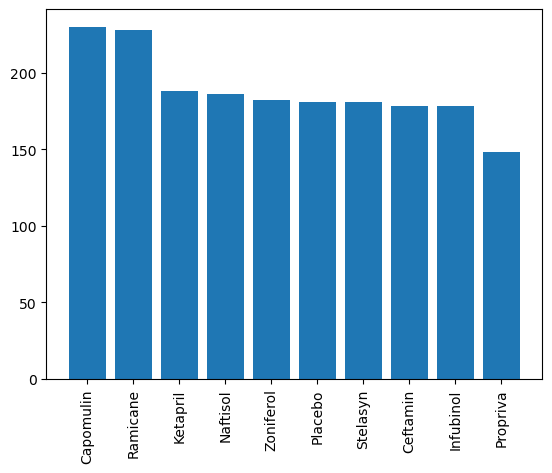

In [191]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#drug_regimen_sorted.plot(kind="bar", y="Timepoint", ylabel="Number of Mice Tested", legend= False)

drug_regimen = cleaned_df.groupby("Drug Regimen").count()
timepoint = drug_regimen.sort_values(by="Timepoint", ascending=False)["Timepoint"]
x_axis = np.arange(len(timepoint))
tick_locations = [value for value in x_axis]
drugs = timepoint.index.tolist()

plt.bar(x_axis, timepoint)
plt.xticks(tick_locations, drugs,rotation=90)

<AxesSubplot:ylabel='Sex'>

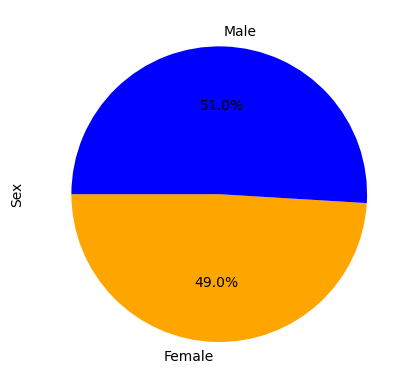

In [226]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = cleaned_df.groupby("Sex").count()
mouse_sex
mouse_sex.plot(kind="pie", y="Mouse ID", legend=False, autopct="%1.1f%%",ylabel="Sex", startangle=180, colors=["orange","blue"])

Text(0, 0.5, 'Sex')

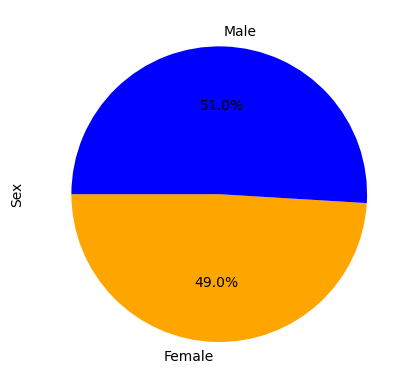

In [222]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = cleaned_df.groupby("Sex").count()
values = mouse_sex["Mouse ID"]
colors = ["orange", "blue"]
plt.pie(values, labels=values.index, colors=colors, autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")

# *Quartiles, Outliers and Boxplots*

In [227]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = cleaned_df.loc[(cleaned_df["Drug Regimen"]=="Capomulin") | (cleaned_df["Drug Regimen"]=="Ramicane") | (cleaned_df["Drug Regimen"]=="Infubinol") | (cleaned_df["Drug Regimen"]=="Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = final_tumor_volume.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(cleaned_df,on=['Mouse ID','Timepoint'],how="left")


In [195]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

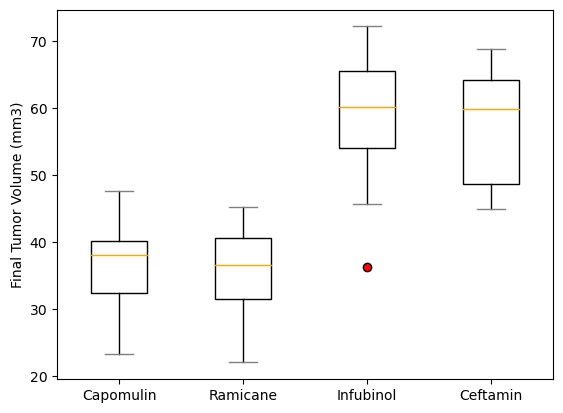

In [196]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, labels=treatment_list, showfliers=True, notch=False, patch_artist=True, boxprops=dict(facecolor="white"), whiskerprops=dict(color='Black'), medianprops=dict(color='Orange'), capprops=dict(color='Gray'),flierprops=dict(markerfacecolor='red'))
# set the title and axis labels
plt.ylabel('Final Tumor Volume (mm3)')

# *Line and Scatter Plots*

Text(0, 0.5, 'Tumor Volume (mm3)')

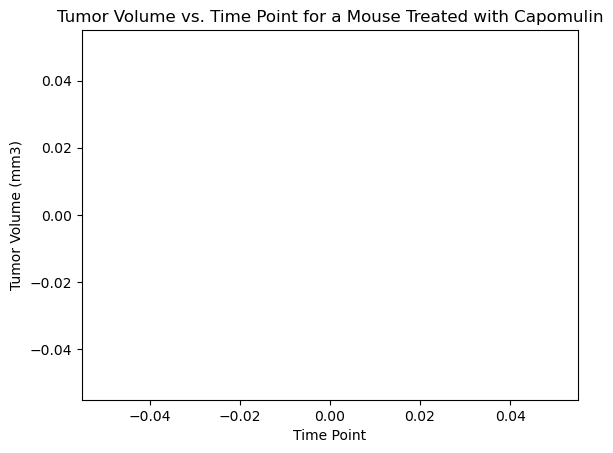

In [216]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = merged_data.loc[(merged_data["Drug Regimen"]=="Capomulin") & (merged_data["Mouse ID"]=="I509"), ['Tumor Volume (mm3)', 'Timepoint']]
Capomulin_data

plt.plot(Capomulin_data["Tumor Volume (mm3)"],Capomulin_data["Timepoint"])
plt.title('Tumor Volume vs. Time Point for a Mouse Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')



<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

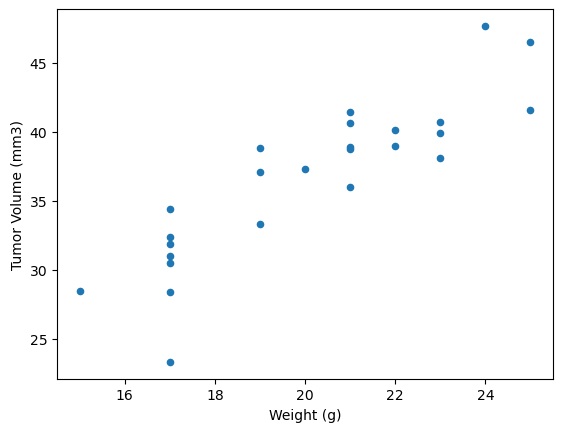

In [198]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_weight = merged_data.loc[(merged_data["Drug Regimen"]=="Capomulin"), ['Tumor Volume (mm3)','Weight (g)']]
Capomulin_weight
Capomulin_weight.plot.scatter(x='Weight (g)', y="Tumor Volume (mm3)")

# *Correlation and Regression*

In [228]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight_campulin=merged_data.loc[(merged_data["Drug Regimen"]=="Capomulin"), ['Weight (g)']]
tumor_volume_campulin=merged_data.loc[(merged_data["Drug Regimen"]=="Capomulin"), ['Tumor Volume (mm3)']]
(slope, intercept, rvalue, pvalue,stderr) = stats.linregress(weight_campulin, tumor_volume_campulin)
d_fit = d_slope * year + d_int
plt.scatter(weight_campulin,tumor_volume_campulin)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')



ValueError: too many values to unpack (expected 4)